## V339 Del file management

In [1]:
"""
Very specific script to analyze .txt files from various observers.
The files had different delimiters, amount of columns, and different amounts of header rows.
This script navigates those nuances as best as an hour or so of work would let me!

What it needs:
 - all of the files in the same directory
 - file not named below? not analyzed
 - different kind of delimiter? can't help you here!
 
What it does: 
 - reads in the specifically named groups of .txt files
 - assigns the column names and header row numbers to said groups
 - groups all of that information in a master list to be iterates and fed into pandas
 - collects the necessary information in to three arrays (time, Vmag, and Verr)
 - Saves unsorted and sorted (by time) files under:
   V339Del_compiled_sorted.fits
   V339Del_compiled_unsorted.fits
   V339Del_compiled_sorted.txt
  
**CURRENTLY MISSING THE TWO DATASETS THAT WERE PLAINTEXT IN EMAIL**

written by M. Davis on Aug. 6th 2019 
for preparation of timing analysis on V339 Del
"""

import pandas as pd
import numpy as np
from itertools import chain
from astropy.table import Table
import matplotlib.pyplot as plt
%matplotlib inline
import glob

#total .txt files in directory
total = glob.glob('*.txt')

#space delimited
CBA_MSU_delim = "\s+"

CBAReport = glob.glob('CBAReport*.txt')
CBAReport_colnames = ["DATE", "VMAG", "VERR","Star1" ,"Star2","Star3","Airm",   "Filter" ,\
                "Group ", "SkyBri."  ,"Expo time","SnapShots", "LimitingMagnitude", "nope"] ##'nope' bc there needs 2b a buffer
CBAReport_header = 34

MSUobs = glob.glob('*measurements.txt')
MSUobs_colnames = ['DATE', 'VMAG', 'VERR',  'Airmass']
MSUobs_header = 12

#  below is an MSUobs one that someone didn't name correctly
CBA = glob.glob('*CBA.txt')



#comma delimited
Ulo_commas_delim = ","

Ulo = glob.glob('*Ulowetz.txt')
Ulo_colnames = ['NAME','DATE','VMAG','VERR','FILTER','TRANS','MTYPE','CNAME','CMAG','KNAME','KMAG', \
                'AIRMASS','GROUP','CHART','NOTES']
Ulo_header = 8

commas = glob.glob('*commas.txt')
commas_colnames = ['NAME','DATE','VMAG','VERR','FILTER','TRANS','MTYPE','CNAME','CMAG','KNAME','KMAG', \
                'AIRMASS','GROUP','CHART','NOTES']
commas_header = 9

#making a master list with all of the files and information needed to open the files properly
filelists = [[[CBAReport, CBAReport_colnames, CBAReport_header], [MSUobs, MSUobs_colnames, MSUobs_header], \
        [CBA, MSUobs_colnames, MSUobs_header]], [[Ulo, Ulo_colnames, Ulo_header], [commas, commas_colnames, commas_header]]]

print("Total *.txt files in directory: {} and total files loaded: {} ".format(len(total), \
                                                            len(CBA)+len(CBAReport)+len(Ulo)+len(commas)+len(MSUobs)))

Total *.txt files in directory: 21 and total files loaded: 21 


In [2]:
#it's gonna print stuff, comment it out if you don't want it. I was bored and put it in.

#empty arrays, these could be prefilled, but we aren't working with much
time = []
Vmag= []
Verr = []
filenum = 1

for i in range(len(filelists)):
    #choose your delimiter
    if i==0:
        delim = CBA_MSU_delim
    else:
        delim = Ulo_commas_delim
        
    #access each set of files and the corresponding info
    for j in range(len(filelists[i])):
        for k in filelists[i][j][0]:
            print("loading new dataset")
            data = pd.read_csv(k ,sep=delim,index_col=False, header=filelists[i][j][2],\
                    names = filelists[i][j][1] )
            
            print("appending time")
            #alright so the silly geese at the MSU observatory drop the 2.4e6, but only in some of the files
            #fix it
            #this can be modified to check all of the files, but... it works for this
            if i == 0 and j != 0:
                if data['DATE'][0] <=2300000:
                    adj_time = data['DATE'] + 2400000
                    time.append(adj_time.to_list())
                else:
                    time.append(data['DATE'].to_list()) #don't forget to close the if loops!
            else:        
                time.append(data['DATE'].to_list())
                
            print("appending Vmag")
            Vmag.append(data['VMAG'].to_list())
            
            print("appending Verr")
            Verr.append(data['VERR'].to_list())
            
            print("---------{}----------".format(filenum))
            filenum += 1

time = list(chain.from_iterable(time))
Vmag = list(chain.from_iterable(Vmag))
Verr = list(chain.from_iterable(Verr))

loading new dataset
appending time
appending Vmag
appending Verr
---------1----------
loading new dataset
appending time
appending Vmag
appending Verr
---------2----------
loading new dataset
appending time
appending Vmag
appending Verr
---------3----------
loading new dataset
appending time
appending Vmag
appending Verr
---------4----------
loading new dataset
appending time
appending Vmag
appending Verr
---------5----------
loading new dataset
appending time
appending Vmag
appending Verr
---------6----------
loading new dataset
appending time
appending Vmag
appending Verr
---------7----------
loading new dataset
appending time
appending Vmag
appending Verr
---------8----------
loading new dataset
appending time
appending Vmag
appending Verr
---------9----------
loading new dataset
appending time
appending Vmag
appending Verr
---------10----------
loading new dataset
appending time
appending Vmag
appending Verr
---------11----------
loading new dataset
appending time
appending Vmag
ap

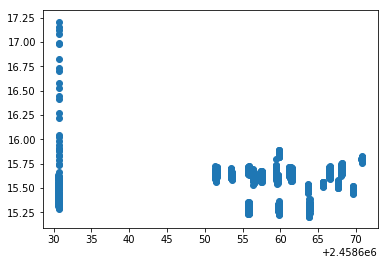

In [3]:
#a prelim plot, the plt.xlims below take a peak at the two groupings of data
plt.scatter(time, Vmag)
#plt.xlim(2.45863055e6, 2.4586308e6) ##feature here is interesting
#plt.xlim(2.45865e6, 2.45867e6)
#plt.ylim(15.0, 16.00)

In [4]:
#saving the fits files
data = Table({'time (JD)': time,
     'Vmag': Vmag,
    'Verr': Verr},
          names=['time (JD)', 'Vmag', 'Verr'])
data.write("V339Del_compiled_unsorted.fits", overwrite=False)
data.sort('time (JD)')
data.write("V339Del_compiled_sorted.fits", overwrite=False)
#this might work, maybe not. Elias would like a text file
data.write("V339del_compiled_sorted.txt", overwrite=False)

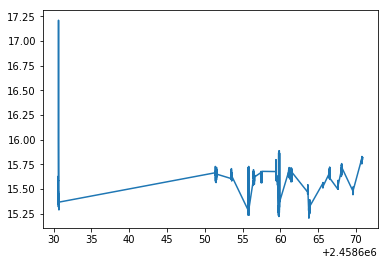

In [6]:
#just to see that they are sorted
plt.plot(data['time (JD)'], data['Vmag'])

## Voila. Hope it's not buggy!
